In [35]:
# pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer

# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anushaagarwal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anushaagarwal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anushaagarwal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Load the AAPL_tweets data
aapl_tweets = pd.read_csv('AAPL_Tweets.csv')

In [4]:
# Check for missing values
print(aapl_tweets.isnull().sum())  # Identify any columns with missing values
# Drop rows with missing values in the 'body' column
aapl_tweets.dropna(subset=['body'], inplace=True)
print(len(aapl_tweets))
aapl_tweets.head()

tweet_id           0
writer         10624
post_date          0
body               0
comment_num        0
retweet_num        0
like_num           0
dtype: int64
1480311


,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550443807834402816,i_Know_First,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
3,550443808606126081,aaplstocknews,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
4,550443809700851716,iknowfirst,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [5]:
# Preprocessing the text data
# Define a function to clean and preprocess the tweet text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'\@w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize the tokens (you can switch to PorterStemmer if preferred)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a string
    clean_text = ' '.join(tokens)
    return clean_text

In [6]:
# Apply the preprocessing function to the 'body' column
aapl_tweets['clean_body'] = aapl_tweets['body'].apply(preprocess_text)
aapl_tweets

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,clean_body
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,lx made aapl check learn howtotrade exe watt i...
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,insanity today weirdo massive selling aapl bid...
2,550443807834402816,i_Know_First,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,swing trading return day swingtrading forecast...
3,550443808606126081,aaplstocknews,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,swing trading return day swingtrading forecast...
4,550443809700851716,iknowfirst,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,swing trading return day swingtrading forecast...
...,...,...,...,...,...,...,...,...
1480306,1212159254884433921,QuantWolfLine,2019-12-31 23:51:01,Imagine calling your broker-dealer and wanting...,1,0,1,imagine calling brokerdealer wanting buy good ...
1480307,1212159275637886976,GMGRIFF_79,2019-12-31 23:51:06,"$AAPL yearly~ Heck of a year.. Jan. 2, 1999~ar...",0,0,1,aapl yearly heck year jan around buck lolhave ...
1480308,1212159765914079234,TEEELAZER,2019-12-31 23:53:03,That $SPY $SPX puuump in the last hour was the...,1,0,6,spy spx puuump last hour eoy eoq eom top windo...
1480309,1212160410692046849,MoriaCrypto,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,1,0,1,dont discriminate aapl msft


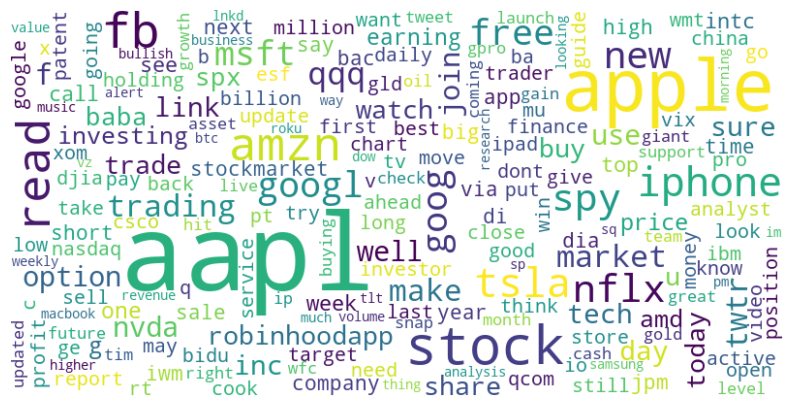

In [10]:
# Visualizing the data - Word Cloud for most frequent words
all_words = ' '.join([text for text in aapl_tweets['clean_body']])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, collocations=False, background_color="white").generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
# Sentiment Analysis using NLTK's SentimentIntensityAnalyzer
# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment scores
def get_sentiment_scores(text):
    return sia.polarity_scores(text)['compound']

# Apply the function to the clean text column
aapl_tweets['sentiment_score'] = aapl_tweets['clean_body'].apply(get_sentiment_scores)

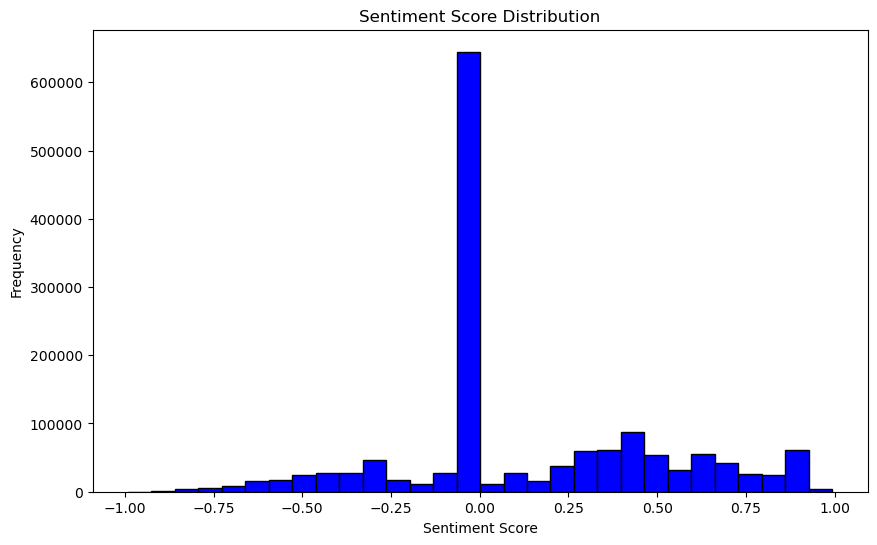

In [12]:
# Visualizing the distribution of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(aapl_tweets['sentiment_score'], bins=30, color='blue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Aggregating sentiment scores by date
# Ensure the 'post_date' column is in datetime format
aapl_tweets['post_date'] = pd.to_datetime(aapl_tweets['post_date'])

# Group by date and calculate the average sentiment score for each day
daily_sentiment = aapl_tweets.groupby(aapl_tweets['post_date'].dt.date)['sentiment_score'].mean()


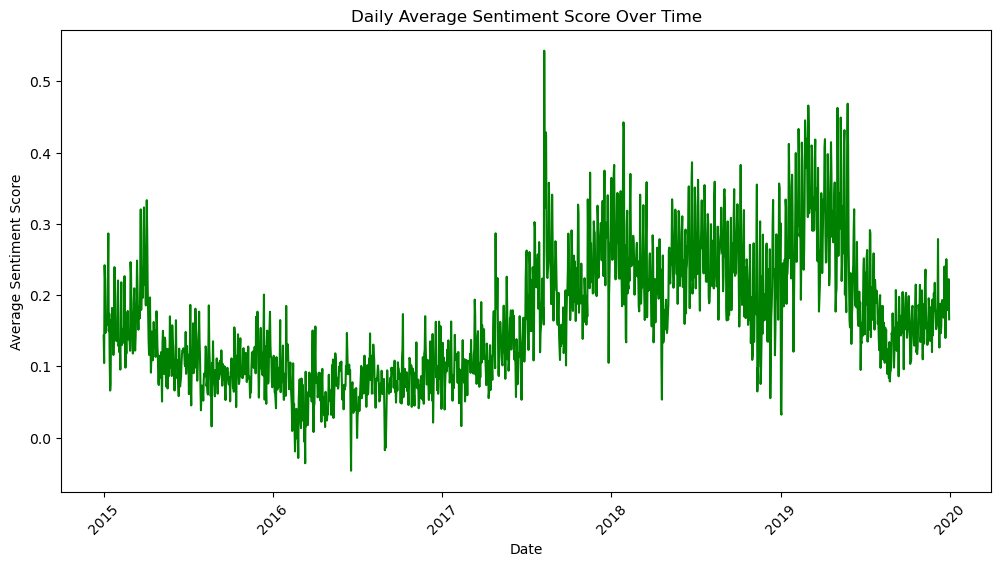

In [14]:
# Plotting the daily sentiment trend over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment.index, daily_sentiment.values, color='green')
plt.title('Daily Average Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()

In [15]:
daily_sentiment = pd.DataFrame(daily_sentiment).reset_index()
daily_sentiment

,post_date,sentiment_score
0,2015-01-01,0.143239
1,2015-01-02,0.104553
2,2015-01-03,0.241900
3,2015-01-04,0.221991
4,2015-01-05,0.146851
...,...,...
1821,2019-12-27,0.197678
1822,2019-12-28,0.178845
1823,2019-12-29,0.194674
1824,2019-12-30,0.222292


In [16]:
# Save the final DataFrame with sentiment scores
daily_sentiment.to_csv('AAPL_Tweets_with_Sentiment.csv', index=False)